In [1]:
import pandas as pd
import pylab as plt

In [25]:
dta = [63.2,67.9,55.8,49.5,50.2,55.4,
       49.9,45.3,48.1,61.7,55.2,53.1,
       49.5,59.9,30.6,30.4,33.8,42.1,
       35.8,28.4,32.9,44.1,45.5,36.6,
       39.5,49.8,48.8,29,37.3,34.2,
       47.6,37.3,39.2,47.6,43.9,49,
       51.2,60.8,67,48.9,65.4,65.4,
       67.6,62.5,55.1,49.6,57.3,47.3,
       45.5,44.5,48,47.9,49.1,48.8,
       59.4,51.6,51.4,60.9,60.9,56.8,
       58.6,62.1,64,60.3,64.6,71,
       79.4,59.9,83.4,75.4,80.2,55.9,
       58.5,65.2,69.5,59.1,21.5,62.5,
       170,-47.4,62.2,60,33.1,35.3,
       43.4,42.7,58.4,34.4]
rng = pd.date_range('1971/09',periods=88,freq='D')
data = pd.Series(dta,name='Permanent population change',index=rng)

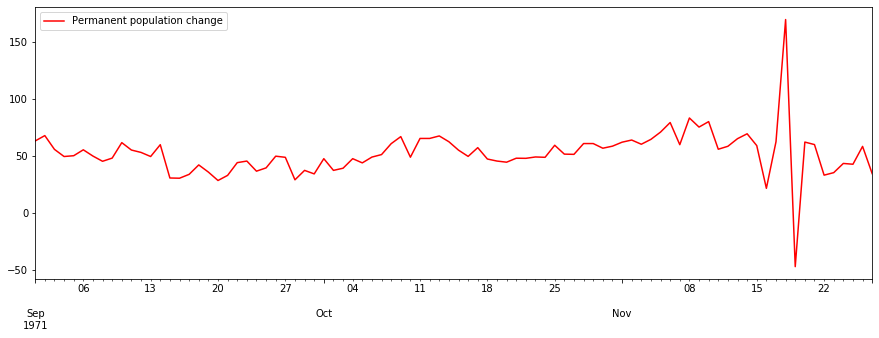

In [27]:
data.plot(figsize=[15,5],colors='r')
plt.legend()

In [28]:
from statsmodels.stats.diagnostic import unitroot_adf # 平稳性检验
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
print(unitroot_adf(data,maxlag = 2))
print("-------+-+-+-+这-里-是-分-割-线+-+-+-+-----------")
print(acorr_ljungbox(data,lags=12))

(-3.557233542389868, 0.0066332776495283945, 2, 85, {'1%': -3.5097356063504983, '5%': -2.8961947486260944, '10%': -2.5852576124567475}, 752.5692852319779)
-------+-+-+-+这-里-是-分-割-线+-+-+-+-----------
(array([ 0.82418111,  1.21096963, 12.3698269 , 16.3253033 , 17.38901838,
       17.85815196, 17.95249474, 22.91480793, 22.91944345, 23.04822637,
       23.06549743, 24.27503387]), array([0.36396054, 0.54580975, 0.00621793, 0.00261232, 0.00381816,
       0.00659663, 0.01218618, 0.00347536, 0.00637979, 0.01056996,
       0.01730294, 0.01865759]))


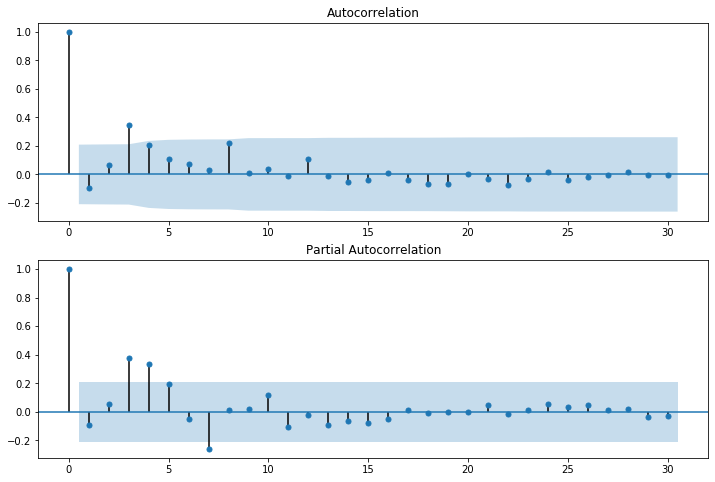

In [29]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(),lags=30,ax=ax1)
fig = sm.graphics.tsa.plot_pacf(data,lags=30,ax=ax2)

In [30]:
# 根据bic准则编写函数来推荐最优的模型：
def SelectModel(data):
    best_model = sm.tsa.ARMA(data,(0,0)).fit()
    for i in range(4):
        for j in range(4):
            arma_mod = sm.tsa.ARMA(data,(i,j)).fit()
            print('当p和q为，相应的bic值为：',i,j,arma_mod.bic)
            if best_model.bic > arma_mod.bic :
                best_model = arma_mod
    print('根据bic准则，选出最优的模型为：',best_model.summary2())
            
SelectModel(data)

当p和q为，相应的bic值为： 0 0 791.5098642603887
当p和q为，相应的bic值为： 0 1 795.3088372810338
当p和q为，相应的bic值为： 0 2 798.1022793003177
当p和q为，相应的bic值为： 0 3 781.1382894467802
当p和q为，相应的bic值为： 1 0 795.1865582682397
当p和q为，相应的bic值为： 1 1 797.1356751723263
当p和q为，相应的bic值为： 1 2 783.4445965699574
当p和q为，相应的bic值为： 1 3 783.1086859021757
当p和q为，相应的bic值为： 2 0 799.3882227681097
当p和q为，相应的bic值为： 2 1 794.3236332058834
当p和q为，相应的bic值为： 2 2 785.7429980597542
当p和q为，相应的bic值为： 2 3 787.5202092334266
当p和q为，相应的bic值为： 3 0 791.6729489098086
当p和q为，相应的bic值为： 3 1 787.9889945694956
当p和q为，相应的bic值为： 3 2 785.3866801805156
当p和q为，相应的bic值为： 3 3 788.9613649958915
根据bic准则，选出最优的模型为：                                   Results: ARMA
Model:                ARMA                        BIC:                 781.1383  
Dependent Variable:   Permanent population change Log-Likelihood:      -379.38   
Date:                 2019-11-13 18:02            Scale:               1.0000    
No. Observations:     88                          Method:              css-mle  

In [31]:
arma_mod = sm.tsa.ARMA(data,(0,3)).fit()
arma_mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: ARMA
=================================================================================
Model:                ARMA                        BIC:                 781.1383  
Dependent Variable:   Permanent population change Log-Likelihood:      -379.38   
Date:                 2019-11-13 18:02            Scale:               1.0000    
No. Observations:     88                          Method:              css-mle   
Df Model:             4                           Sample:              09-01-1971
Df Residuals:         84                                               11-27-1971
Converged:            1.0000                      S.D. of innovations: 17.909    
No. Iterations:       15.0000                     HQIC:                773.742   
AIC:                  768.7516                                                   
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
const                             52.3134   2.3885 21.9026 0.0000 47.6321 56.9946
ma.L1.Permanent population change -0.3425   0.0955 -3.5874 0.0006 -0.5297 -0.1554
ma.L2.Permanent population change  0.1422   0.0907  1.5683 0.1206 -0.0355  0.3200
ma.L3.Permanent population change  0.4659   0.0845  5.5164 0.0000  0.3004  0.6314
----------------------------------------------------------------------------------------------
                      Real               Imaginary              Modulus              Frequency
----------------------------------------------------------------------------------------------
MA.1                 0.6481                -0.9594               1.1577                -0.1554
MA.2                 0.6481                 0.9594               1.1577                 0.1554
MA.3                -1.6014                -0.0000               1.6014                -0.5000
=================================================================================

"""

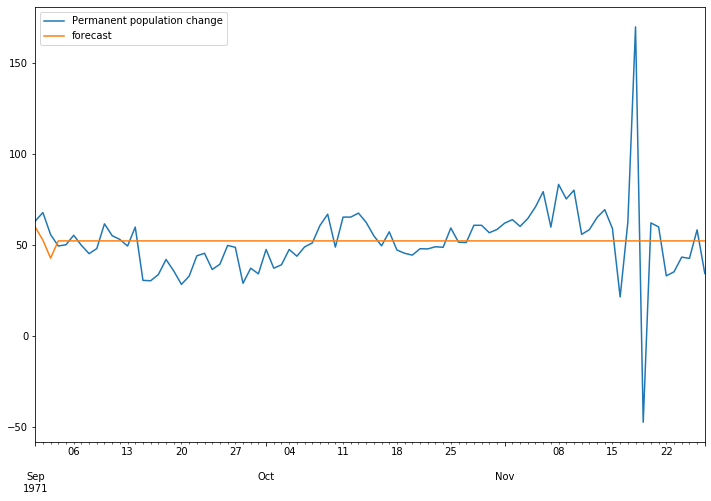

In [33]:
predict_number = arma_mod.predict(len(data),len(data)+5)
print(predict_number)

1971-11-28    59.922106
1971-11-29    52.719076
1971-11-30    42.851666
1971-12-01    52.313352
1971-12-02    52.313352
1971-12-03    52.313352
Freq: D, dtype: float64


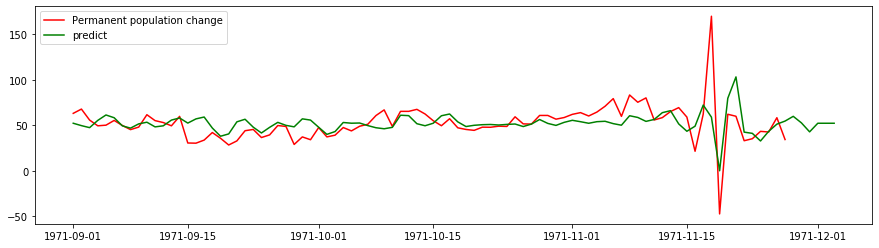

In [45]:
predict_number = arma_mod.predict(0,len(data)+5)
plt.plot(data,color='r',label='Permanent population change')
plt.plot(predict_number,color='g',label = 'predict')
plt.rcParams['figure.figsize'] = (25.0, 4.0)
plt.legend(loc='best')